In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
data = pd.read_csv("/content/gdrive/My Drive/Diabetes_Prediction/diabetes.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Dataset Visualization**

In [10]:
X = data.iloc[:,[0,1,2,3,4,5,6,7]].values
y = data.iloc[:,-1].values

**Tsne Dimensionality Reduction**

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [15]:
from sklearn.manifold import TSNE
#Reducing the dataset to 2 Dimensions
model = TSNE(n_components=2)
tsne_data = model.fit_transform(X) 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_data[:,0]
df_subset['tsne-2d-two'] = tsne_data[:,1]
df_subset['Target'] = y

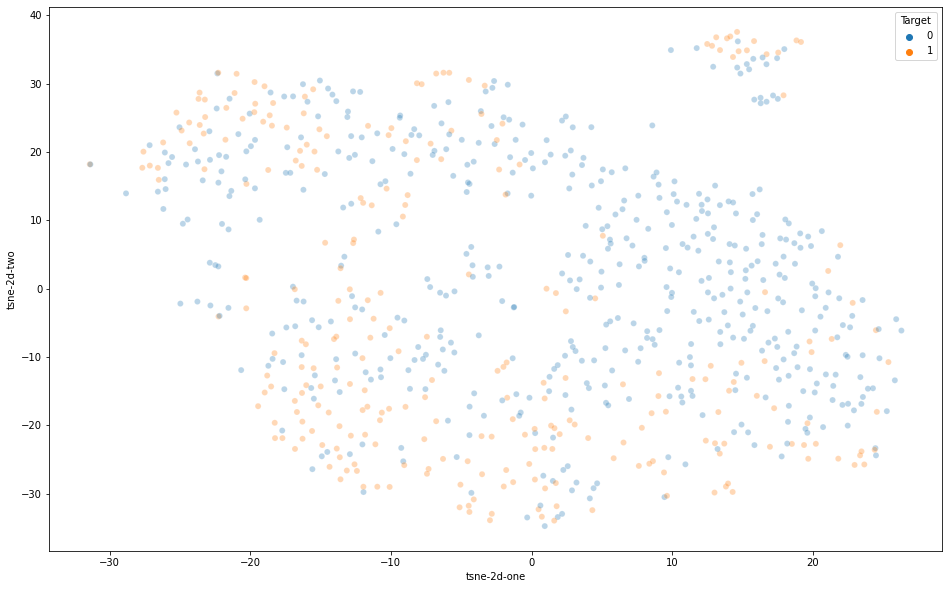

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Target",
    data=df_subset,
    legend="full",
    alpha=0.3
)

**PCA Dimensionality Reduction**

In [22]:
X = data.iloc[:,[0,1,2,3,4,5,6,7]].values

In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X = pca.fit_transform(X)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df_subset = pd.DataFrame()
df_subset['pca-2d-one'] = X[:,0]
df_subset['pca-2d-two'] = X[:,1]
df_subset['Target'] = y

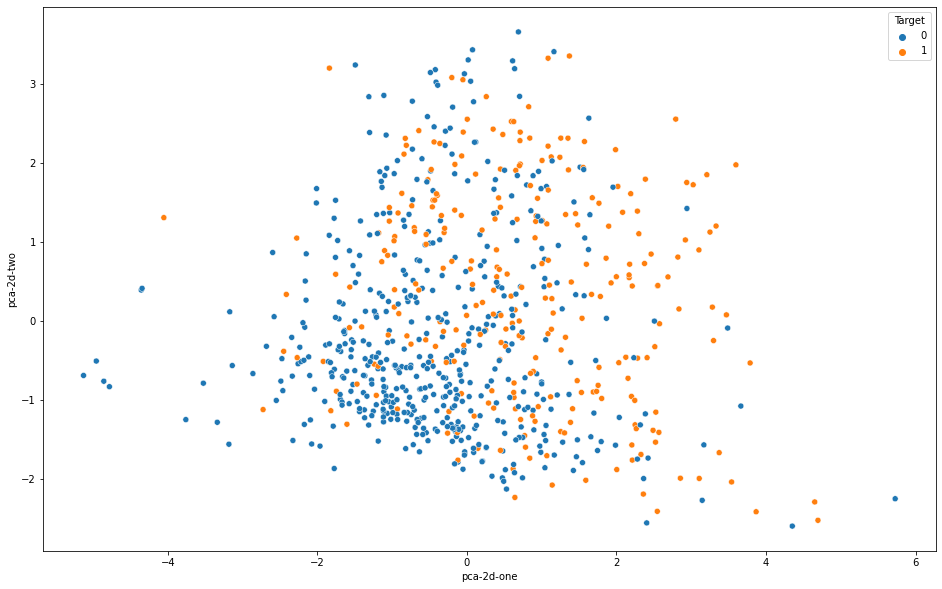

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="Target",
    data=df_subset,
)

**Hence DataSet is not Linearly Seperable**

In [33]:
cor = data.corr()

Correlation between the Features

In [34]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


1. Decision Tree Classifier

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.05,random_state=0)
from sklearn.tree import DecisionTreeClassifier
#training the classifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)

#predicting

y_pred=clf.predict(X_test)



#testing the accuracy

accuracy=accuracy_score(Y_test,y_pred)
print(str(accuracy*100)+"% accuracy")


79.48717948717949% accuracy


2. Logistic Regression 

In [42]:
X = data.iloc[:,[0,1,2,3,4,5,6,7]].values
y = data.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8020833333333334


3. KNN

In [57]:
X = data.iloc[:,[0,1,2,3,4,5,6,7]].values
y = data.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8020833333333334


4. SVM

In [59]:
X = data.iloc[:,[0,1,2,3,4,5,6,7]].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8020833333333334


4. Kernel SVM (rbf)

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7760416666666666


5. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.765625


6. Random Forest Classifier

In [76]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.78125


Now after removing columns Skin thickness and Blood Pressure  

In [77]:
X = data.iloc[:,[0,1,4,5,6,7]].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7604166666666666


In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7916666666666666
